<a href="https://colab.research.google.com/github/sapanapawar/Health-Insurance-Cross-Sell-Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

#Loading the Required Libraries and Modules


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
%matplotlib inline

#Importing Modules
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score, roc_curve, classification_report, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

#Mount drive & load the dataset

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Working directory path
file_path = '/content/drive/MyDrive/pd csv file/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'

In [4]:
#Reading the dataset
df = pd.read_csv(file_path)

#Data Exploration

In [5]:
#Let's how the dataset look like
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [6]:
#Observing first five rows
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
#Observing last five rows
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [8]:
#Checking for number of rows and columns
df.shape

(381109, 12)

Dataset has 381109 rows and 12 columns. 

In [9]:
#Let's see the descriptive summary 
df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [10]:
#Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [11]:
#Looking for duplicates
df.duplicated().sum()

0

There are no duplicates present in the dataset.

#Checking for Null/NaN/Missing Values

In [12]:
#Checking for is their any null value present or not
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There is no missing value present in the dataset.

#Checking for Outliers

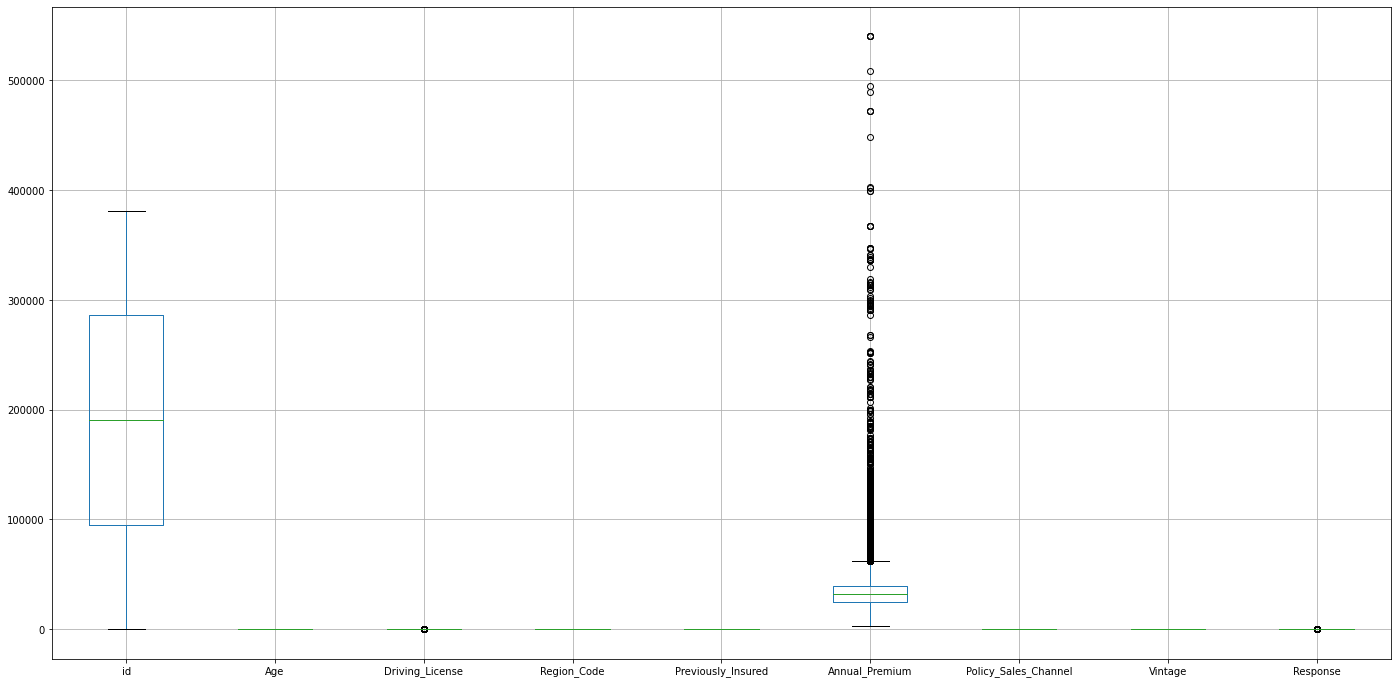

In [13]:
#Checking for outliers by plotting boxplot
fig = plt.figure(figsize =(24, 12))
df.boxplot()

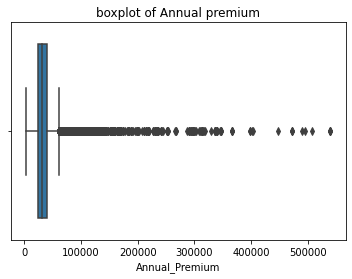

In [14]:
#Plotting boxplot of Annual_Premium
sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()



*   From the boxplot we can observe lot of outliers in the variable 'Annual_Premium'. So we have to remove the outliers.



In [15]:
#Removing Outliers using IQR
def outliers(df, variable, distance):
     IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
     lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
     upper_boundary = df[variable].quantile(0.75) + (IQR * distance) 
        
     return upper_boundary, lower_boundary
    
upper_limit, lower_limit = outliers(df, 'Annual_Premium', 1.5)
upper_limit, lower_limit 

(61892.5, 1912.5)

In [16]:
df['Annual_Premium']= np.where(df['Annual_Premium'] > upper_limit, upper_limit, 
                                 np.where(df['Annual_Premium'] < lower_limit, lower_limit, df['Annual_Premium']))

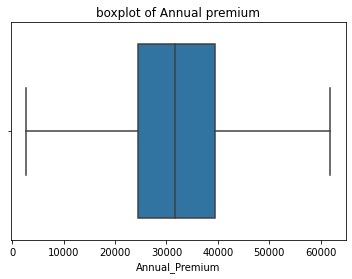

In [17]:
#Plotting boxplot after removing outliers
sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

In [18]:
df.shape

(381109, 12)

In [19]:
df['Annual_Premium'].isnull().sum()

0

#Data Visualization

#Target Variable

Percentage of target class

0    87.743664
1    12.256336
Name: Response, dtype: float64


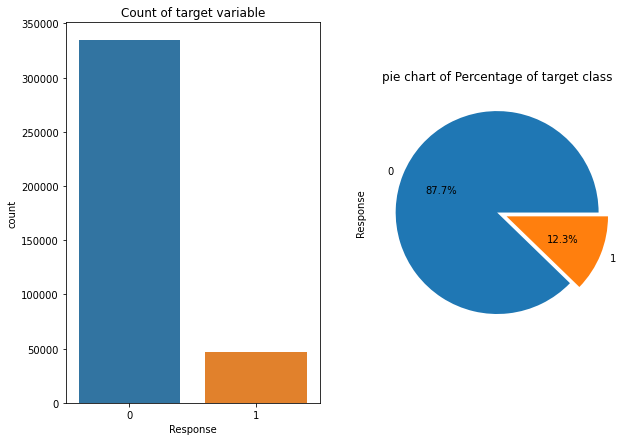

In [20]:
#Plotting the count of Response
plt.subplot(1, 2, 1)
sns.countplot(df['Response'])
plt.title("Count of target variable")

#Plotting the percentage of Response
plt.subplot(1,2,2)
count = df['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%', figsize = (10,7),explode = [0,0.1], title = "pie chart of Percentage of target class")
print( "Percentage of target class\n")
print(df['Response'].value_counts()/len(df)*100)


*   The target variable is highly imbalanced.

*   By the plot we can say that this is imbalance binary classification problem.

*   The customers interested in insurance is 87 % as compared to the other one.




#Univariate Analysis Of Categorical Variables

In [21]:
#Categorical Variables
cat_var = ['Vehicle_Age', 'Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage', 'Response' ]

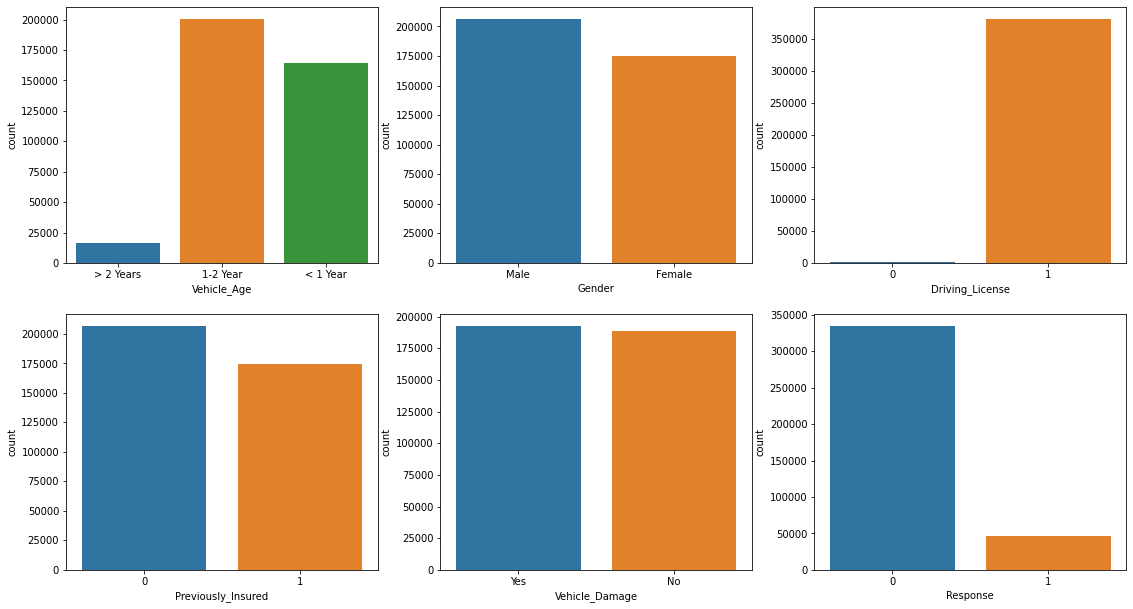

In [22]:
#Plotting count plot of every categorical variable
plt.figure(figsize=(19, 16))
plt.subplot(3,3,1)
sns.countplot(df['Vehicle_Age'])
plt.subplot(3,3,2)
sns.countplot(df['Gender'])
plt.subplot(3,3,3)
sns.countplot(df['Driving_License'])
plt.subplot(3,3,4)
sns.countplot(df['Previously_Insured'])
plt.subplot(3,3,5)
sns.countplot(df['Vehicle_Damage'])
plt.subplot(3,3,6)
sns.countplot(df['Response'])

Observations :

*  The plot shows that most of the vehicle taken in this study is 1-2 years old.There is very less number of customers with vehicle age less than 2 years.

*   The gender variable in the dataset is almost equally distributed.

*   Almost all people have driving license.


*   There are more number of people who have no previous insurance policy than the other one.


*   Customers with vehicle damage Yes and NO are equally distributed.

*   We can say that most of the customers are not interested in vehicle insurance policy.



#Bivariate Analysis Of Categorical Variables with Target Variable

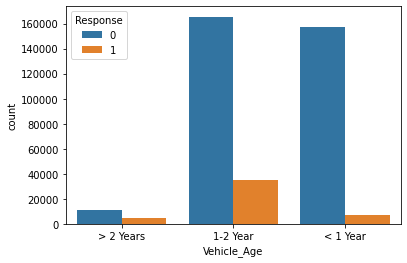

In [23]:
#Plotting the count plot of Vehicle_Age vs Response
sns.countplot(x ='Vehicle_Age', hue='Response',data =df)

Customers with vechicle age 1-2 years are more likely to interested in insurance as compared to the other two.

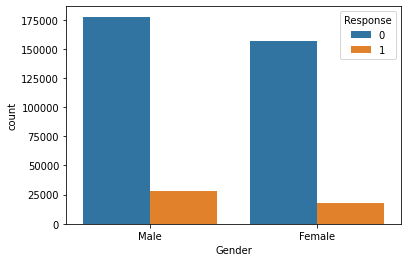

In [24]:
#Plotting the count plot of Gender vs Response
sns.countplot(x ='Gender', hue='Response',data = df)

Male category is slightly greater than that of female and chances of buying the insurance is also little high.

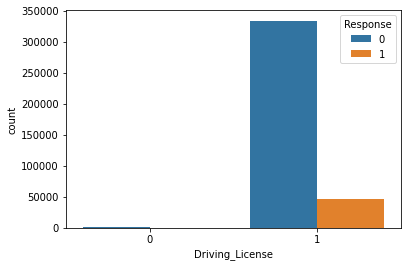

In [25]:
#Plotting the count plot of Driving_License vs Response
sns.countplot(x ='Driving_License', hue='Response',data =df)

Customers who are interested in Vehicle Insurance almost all have driving license.

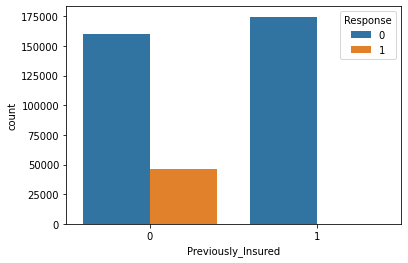

In [26]:
#Plotting the count plot of Previously_Insured vs Response
sns.countplot(x ='Previously_Insured', hue='Response',data =df)

From the plot we can say that almost 175000 people was previously insured but their current response is NO.

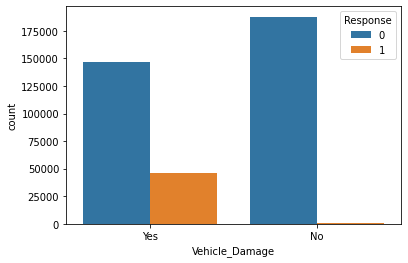

In [27]:
#Plotting the count plot of Vehicle_Damage vs Response
sns.countplot(x ='Vehicle_Damage', hue='Response',data =df)

Customers with vechicle damage are more interested in Vehicle Insurance.



#Univariate Analysis Of Continuous Variables

In [28]:
con_data = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

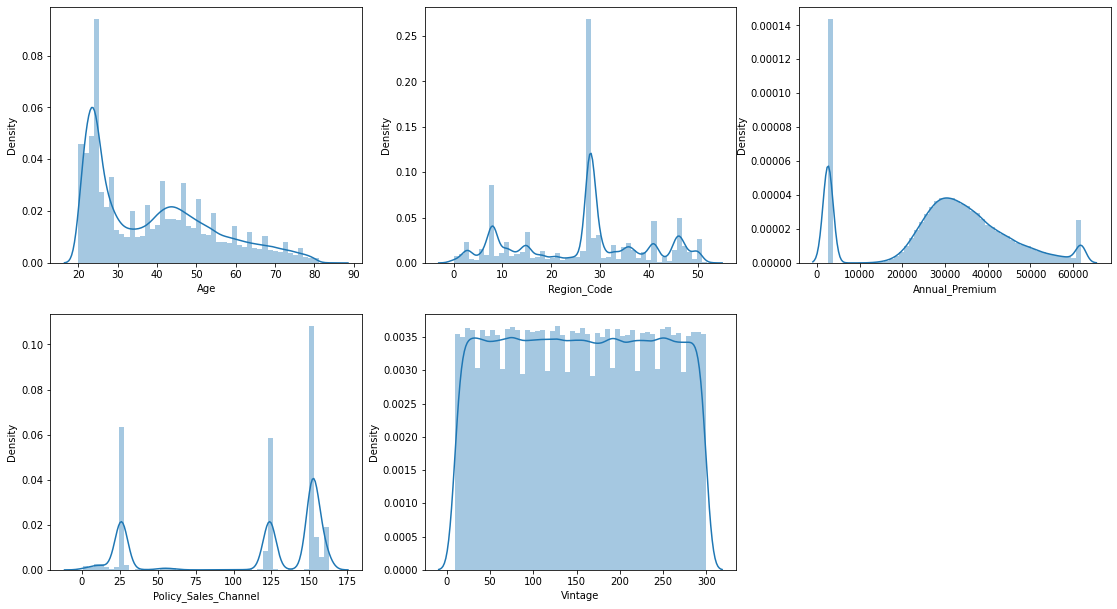

In [29]:
#Plotting the distribution plot of continuous variables
plt.figure(figsize=(19, 16))
plt.subplot(3,3,1)
sns.distplot(df['Age'])
plt.subplot(3,3,2)
sns.distplot(df['Region_Code'])
plt.subplot(3,3,3)
sns.distplot(df['Annual_Premium'])
plt.subplot(3,3,4)
sns.distplot(df['Policy_Sales_Channel'])
plt.subplot(3,3,5)
sns.distplot(df['Vintage'])

Observations:


*   The Column Age is highly skewed towards right.

*   The Column Region Code is randomly distributed.

*   The column Annual Premium normaly distributed with little right skewed.

*   The variable Policy Sales Channel is randomly distributed with hueness.


*   The variable Vintage is uniformly distributed.




#Bivariate Analysis Of Continous Variables with Target Variable

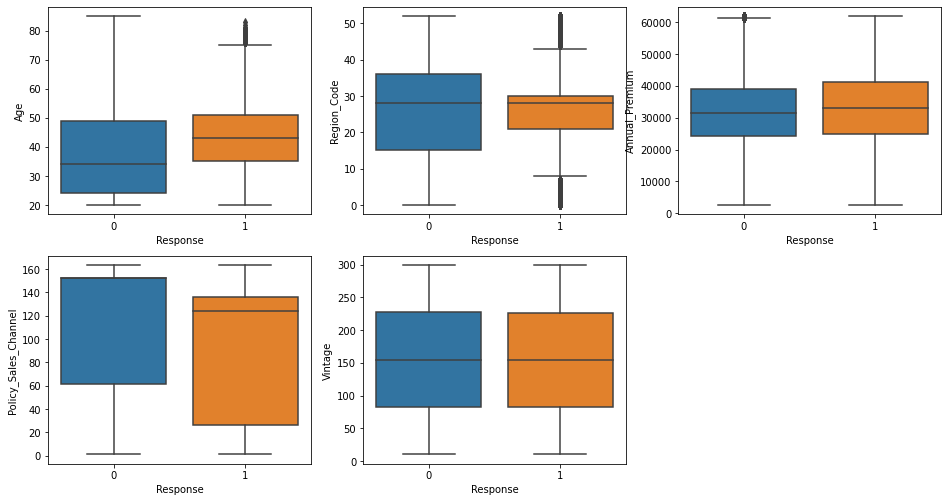

In [30]:
#Plotting box plots of continous variables with Target Variable
plt.figure(figsize=(16, 13))
plt.subplot(3,3,1)
sns.boxplot(df['Response'], df['Age'])
plt.subplot(3,3,2)
sns.boxplot(df['Response'], df['Region_Code'])
plt.subplot(3,3,3)
sns.boxplot(df['Response'], df['Annual_Premium'])
plt.subplot(3,3,4)
sns.boxplot(df['Response'], df['Policy_Sales_Channel'])
plt.subplot(3,3,5)
sns.boxplot(df['Response'], df['Vintage'])
plt.show()

Conclusions :


*  The customers with maximum age are interested in the vehicle insurance.


*  The region code does not affect on the vehicle insurance.

*   Also the Annual Premium doesn't affect on vehicle insurance i.e.it seem to have slighlty elevated Annual Premium with response yes or no.


*   The customers with response yes or no doesn't affect on variable vintage.









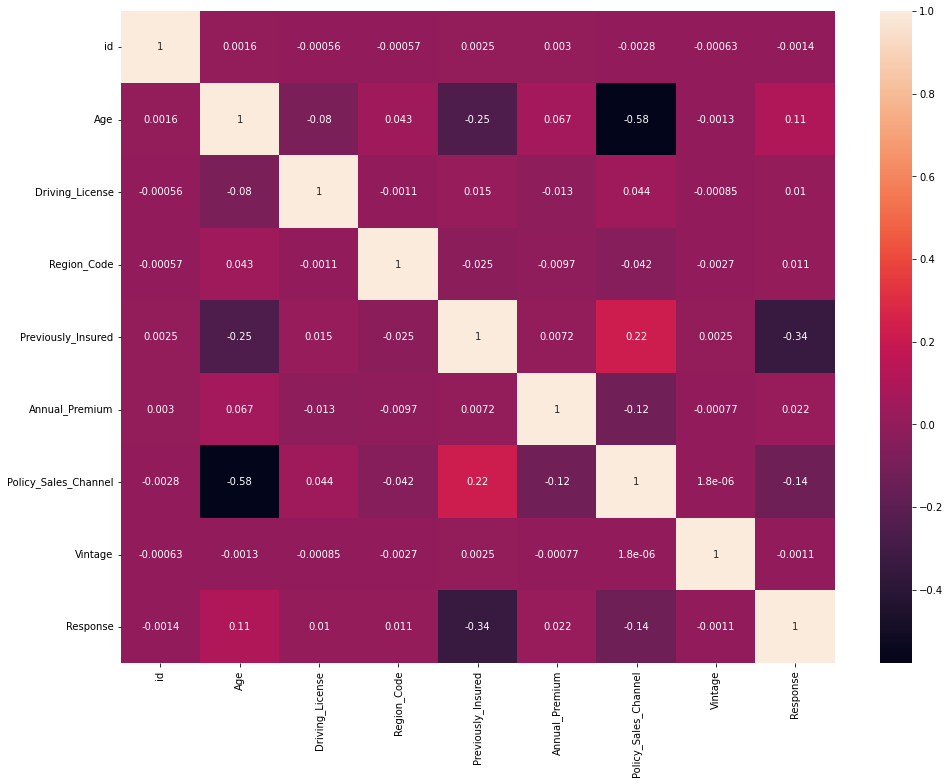

In [31]:
#Correlation Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)

#Lable Encoding

In [32]:
#Importing the label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Vehicle_Age'] = label_encoder.fit_transform(df['Vehicle_Age'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Vehicle_Damage'] = label_encoder.fit_transform(df['Vehicle_Damage'])

In [33]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


#Relationship Between Variables

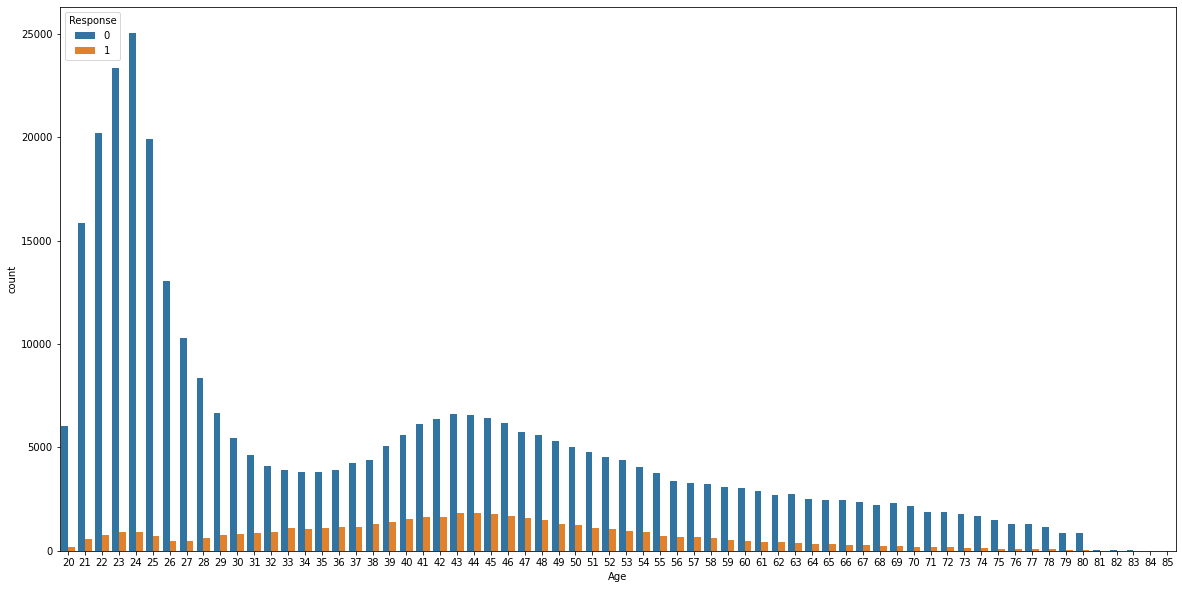

In [34]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df)

The people below the age 30 are not interested in vehicle insurance. Reasons behind this could be lack of experience, less maturity level and they don't have expensive vehicles yet.
People aged between 30-60 are more likely to be interested in vehicle Insurance.

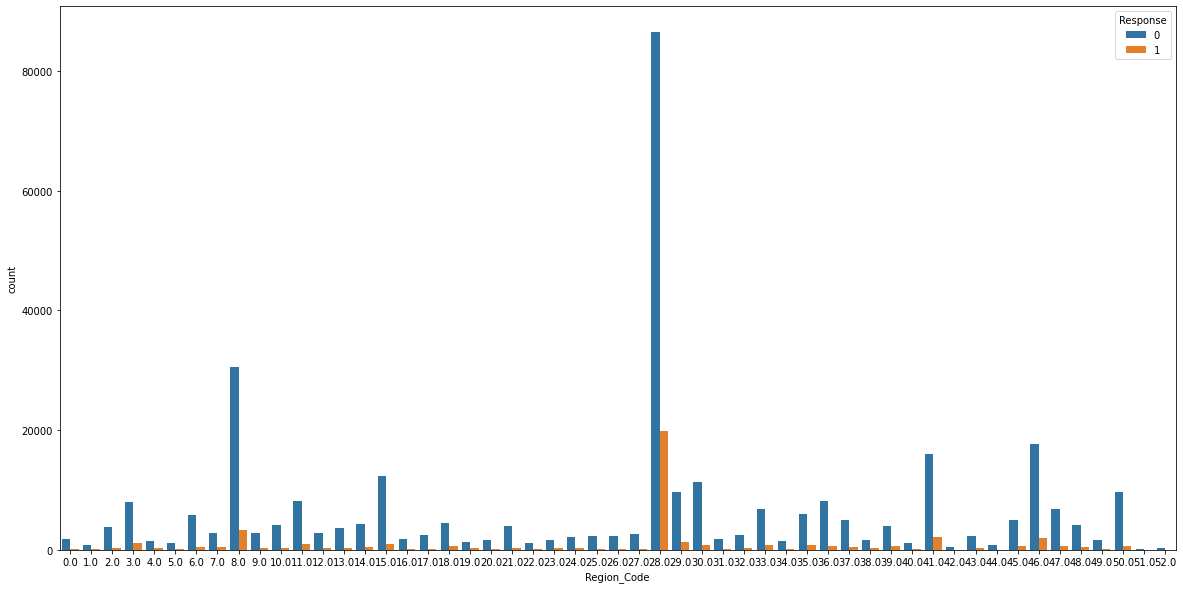

In [35]:
#Age VS Region code
plt.figure(figsize=(20,10))
sns.countplot(x='Region_Code',hue='Response',data=df)

The indivisuals with region code 28 the highest as compared to the other ones and also most interested in vehicle insurance.

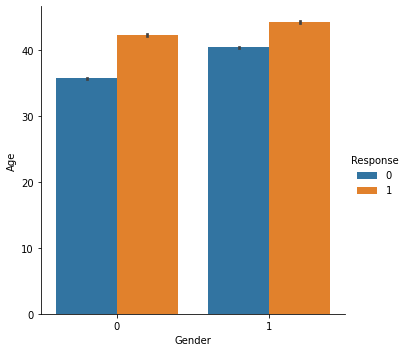

In [36]:
#Plotting catplot 
sns.catplot(x='Gender', y='Age', hue = 'Response', kind = 'bar', data = df) 

More Females have taken insurance as compared to males.

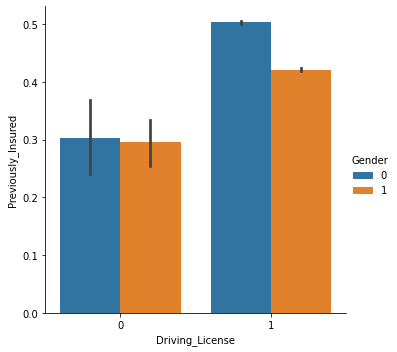

In [37]:
#Plotting catplot 
sns.catplot(x='Driving_License', y='Previously_Insured', hue='Gender', kind = 'bar', data = df)

More number of females who have Previously insured have Driving license.

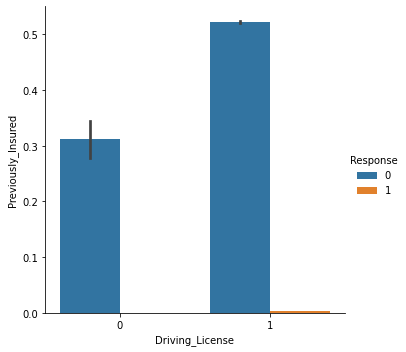

In [38]:
#Plotting catplot 
sns.catplot(x='Driving_License', y='Previously_Insured', hue='Response', kind = 'bar', data = df)

People who have Previously insured have shown interest in taking new insurance.

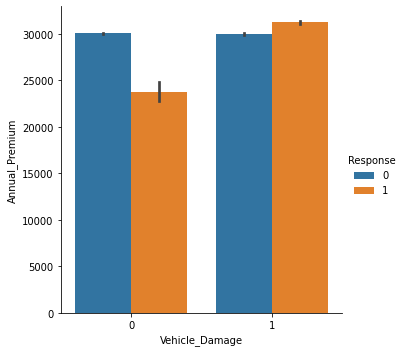

In [39]:
#Plotting catplot
sns.catplot(x='Vehicle_Damage', y='Annual_Premium', hue='Response', kind = 'bar', data = df)

People having Vehicle Damage tend to buy insurance as compared to the ones who do not have any damage.

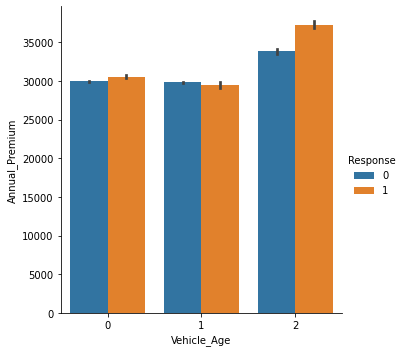

In [40]:
#Plotting catplot
sns.catplot(x='Vehicle_Age', y='Annual_Premium', hue='Response', kind = 'bar', data = df)

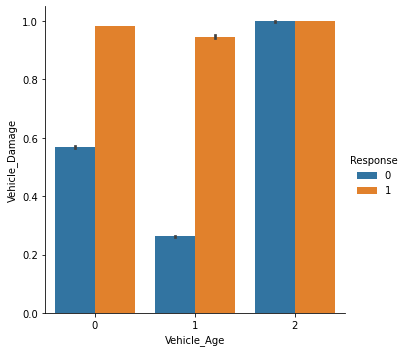

In [41]:
#Plotting catplot
sns.catplot(x='Vehicle_Age', y='Vehicle_Damage', hue='Response', kind = 'bar', data = df)

People having Vehicles with age > 2 years have to pay more amount of annual premium and that has lead to higher number of people from that category not taking insurance. We need to modify the amount little bit so that people from that category do not skip taking insurance.

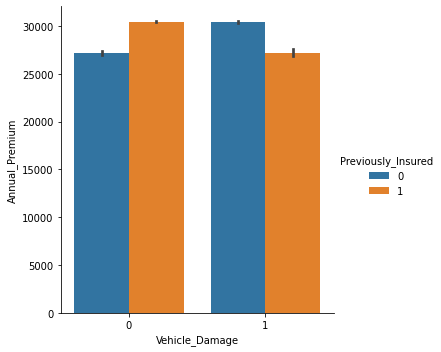

In [42]:
#Plotting catplot
sns.catplot(x='Vehicle_Damage', y='Annual_Premium', hue='Previously_Insured', kind = 'bar', data = df)

People having vehicle damage are not interested most as compared to other ones. 

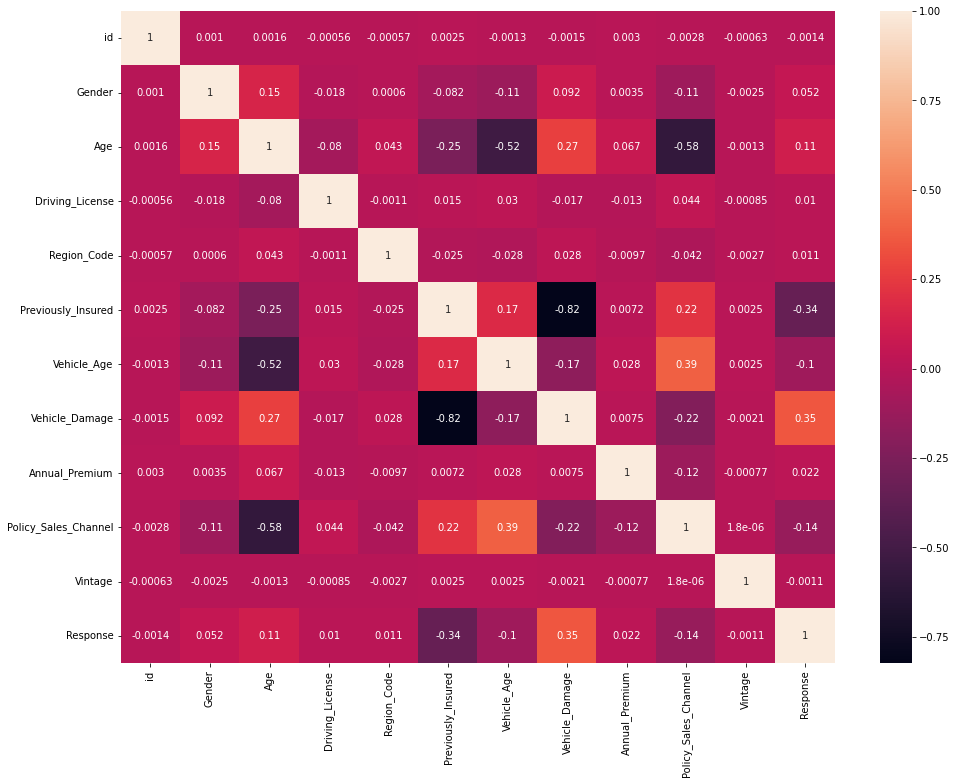

In [43]:
#Correlation Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)

**Conclusion:**




*   We can see that the most influencing factors for Response are Vehicle_Damage and Previously_Insured, followed by Vehicle_Age and Policy_Sales_Channel.



*   Vehicle_Damage is highly correlated with Previously_Insured with correlation of -0.82.


*   Policy_Sales_Channel is correlated with Age with correlation with -0.58.




#Creating Independent and Dependent Variables

In [44]:
#Independent Variable
X = df.drop('Response',axis=1)
X

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74


In [45]:
X.shape

(381109, 11)

In [46]:
#Dependent Variable
y = df['Response']

In [47]:
y.shape

(381109,)

#Feature Selection

[0.23656475 0.02002794 0.10468907 0.00034601 0.08062367 0.01205267
 0.00876375 0.12559904 0.17768202 0.038616   0.19503509]


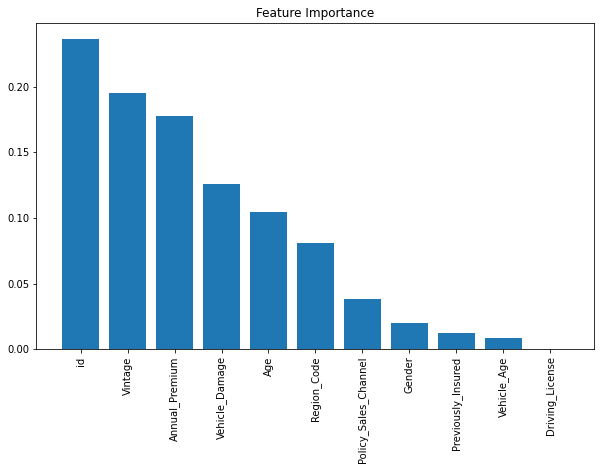

In [48]:
#Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X, y)
print(tree.feature_importances_)

#Plotting a graph showing feature importance
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()



*   The most important features from the dataset are id, vintage, annual premium followed by age and region code.



*   As we can see the less important feature is Driving License. So We have to drop the column Driving License.


*   'id' variable is not important to predict target variable so we can drop it.






In [49]:
#Dropping column Driving License
X = X.drop(['Driving_License'],axis=1)
X = X.drop(['id'], axis=1)

#Handling Imbalanced data

As from the distribution of target variables in the EDA section, we knew it was an imbalance problem.  
So to handle such a problem, we could resample the data. For this problem we used Random Oversampling.

Original dataset shape: 381109
Resampled dataset shape 668798


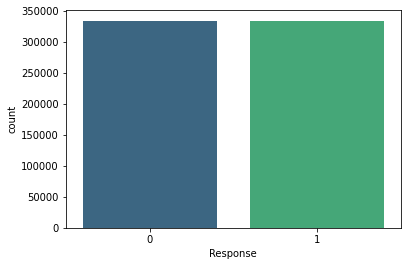

In [50]:
#Importing Random over Sampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(df.iloc[:,0:-1], df['Response'])

print('Original dataset shape:', len(df))
print('Resampled dataset shape', len(y_ros))
sns.countplot(y_ros,palette='viridis')

#Feature Scaling

Our main motive through this step was to scale our data into a uniform format that would allow us to utilize the data in a better way while performing fitting and applying different algorithms to it. 

In [51]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_ros = scaler.fit_transform(x_ros)

#Spliting of data into train and test

In [52]:
#Dividing the dataset into training and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x_ros, y_ros , test_size = 0.3, random_state = 0) 

#**Model** **Implementation**

#**1. Logistic Regression**

Train Accuracy of LR model is :  0.7844958326035227
Test Accuracy of LR model is :  0.7839214513556619
ROC_AUC Score of LR model is : 0.8333495928566582
              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61696
           1       0.98      0.70      0.82    138944

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640

Confusion matrix of LR model is : [[59335 40993]
 [ 2361 97951]]


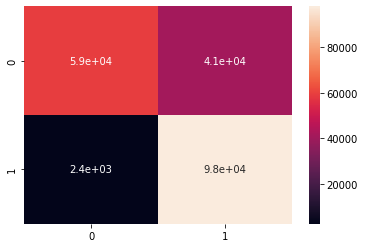

In [53]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

#Fitting the model
lr = LogisticRegression()
lr.fit(X_train,y_train)

#Prediction on test data
y_pred1 = lr.predict(X_test)

#Prediction on train data
y_pred_train1 = lr.predict(X_train)

#Model Evaluation
#Print accuracy and Roc auc values of lr model
print("Train Accuracy of LR model is : ", accuracy_score(y_train,y_pred_train1))
print("Test Accuracy of LR model is : ", accuracy_score(y_test,y_pred1))
print("ROC_AUC Score of LR model is :",roc_auc_score(y_pred1,y_test))
print(classification_report(y_pred1,y_test)) 

#Confusion matrix
con_mat = confusion_matrix(y_test, y_pred1)
print("Confusion matrix of LR model is :", confusion_matrix(y_test, y_pred1))
sns.heatmap(con_mat,annot=True)

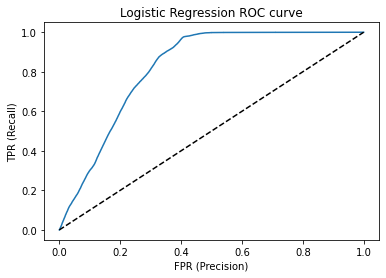

Area under curve (AUC):  0.8200256278673832


In [54]:
#Plotting ROC Curve
lr_score = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, lr_score)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

#**2. Random Forest Classifier**

Train Accuracy of RF model is :  1.0
Test Accuracy of RF model is :  0.9450857256778309
ROC_AUC Score of Rf model is : 0.9499478511584459
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     89896
           1       1.00      0.90      0.95    110744

    accuracy                           0.95    200640
   macro avg       0.95      0.95      0.94    200640
weighted avg       0.95      0.95      0.95    200640

Confusion matrix of RF model is : [[ 89603  10725]
 [   293 100019]]


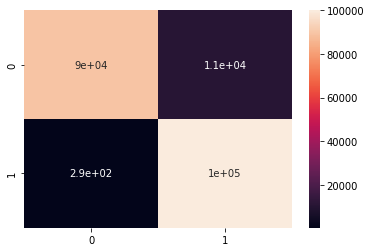

In [55]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Fitting the model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

#Prediction on test data
y_pred2 = rf.predict(X_test)

#Prediction on train data
y_pred_train2 = rf.predict(X_train)

#Model Evaluation
#Print accuracy and Roc auc values of RF model
print("Train Accuracy of RF model is : ", accuracy_score(y_train,y_pred_train2))
print("Test Accuracy of RF model is : ", accuracy_score(y_test,y_pred2))
print("ROC_AUC Score of Rf model is :",roc_auc_score(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

#Confusion matrix
con_mat = confusion_matrix(y_test, y_pred2)
print("Confusion matrix of RF model is :", confusion_matrix(y_test, y_pred2))
sns.heatmap(con_mat,annot=True)

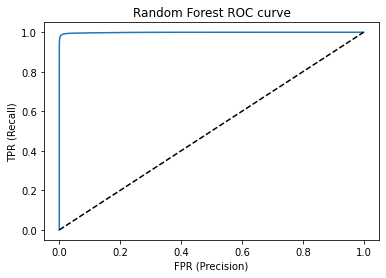

Area under curve (AUC):  0.9989441883989999


In [56]:
#Plotting ROC Curve
rf_score = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, rf_score)

plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

#**3. XGBoost Classifier**

Train Accuracy of XGB model is :  0.7982903207891353
Test Accuracy of XGB model is :  0.7977671451355662
ROC_AUC Score of XGB model is : 0.8210989754705407
              precision    recall  f1-score   support

           0       0.66      0.91      0.77     73284
           1       0.93      0.73      0.82    127356

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.79    200640
weighted avg       0.83      0.80      0.80    200640

Confusion matrix of XGB model is : [[66518 33810]
 [ 6766 93546]]


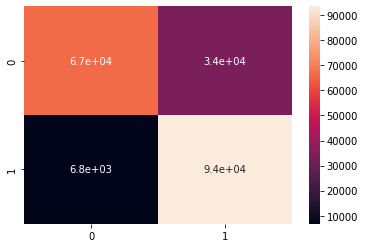

In [57]:
#Importing XGB classifier
from xgboost import XGBClassifier

#Fitting the model
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

#Prediction on test data
y_pred3 = xgb.predict(X_test)

#Prediction on train data
y_pred_train3 = xgb.predict(X_train)

#Model Evaluation
#Print accuracy and Roc auc values of XGB model
print("Train Accuracy of XGB model is : ", accuracy_score(y_train,y_pred_train3))
print("Test Accuracy of XGB model is : ", accuracy_score(y_test,y_pred3))
print("ROC_AUC Score of XGB model is :",roc_auc_score(y_pred3,y_test))
print(classification_report(y_pred3,y_test))

#Confusion matrix 
con_mat = confusion_matrix(y_test, y_pred3)
print("Confusion matrix of XGB model is :", confusion_matrix(y_test,y_pred3))
sns.heatmap(con_mat,annot=True)

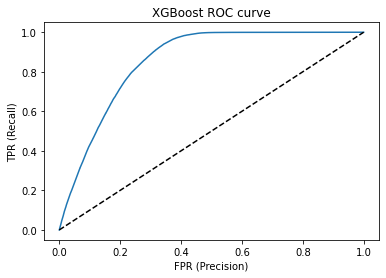

Area under curve (AUC):  0.8555792915776647


In [58]:
#Plotting ROC Curve
xgb_score = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, xgb_score)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

#**4. Naive Baye's Classifier**

Train Accuracy of nbc model is :  0.7844958326035227
Test Accuracy of nbc model is :  0.7839214513556619
ROC_AUC Score of nbc model is : 0.8333495928566582
              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61696
           1       0.98      0.70      0.82    138944

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640

Confusion matrix of nbc model is : [[59335 40993]
 [ 2361 97951]]


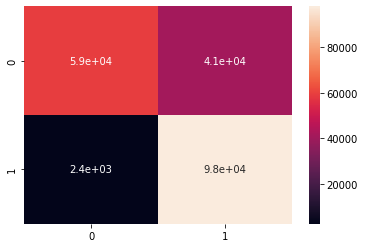

In [59]:
#Importing Naive Baye's Classifier
from sklearn.naive_bayes import GaussianNB

#Fitting the model
nbc = GaussianNB()
nbc.fit(X_train, y_train)

#Prediction on test data
y_pred4 = nbc.predict(X_test)

#Prediction on train data
y_pred_train4 = nbc.predict(X_train)

#Model Evaluation
#Print accuracy and Roc auc values of NBC model
print("Train Accuracy of nbc model is : ", accuracy_score(y_train,y_pred_train4))
print("Test Accuracy of nbc model is : ", accuracy_score(y_test,y_pred4))
print("ROC_AUC Score of nbc model is :",roc_auc_score(y_pred4,y_test))
print(classification_report(y_pred4 ,y_test))

#Confusion matrix
con_mat = confusion_matrix(y_test, y_pred4)
print("Confusion matrix of nbc model is :", confusion_matrix(y_test,y_pred4))
sns.heatmap(con_mat,annot=True)

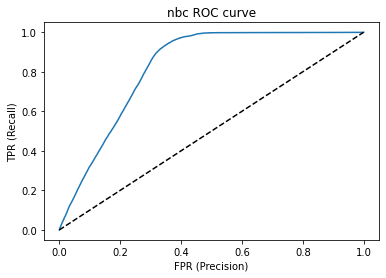

Area under curve (AUC):  0.8239761411543738


In [60]:
#Plotting ROC Curve
nbc_score = nbc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, nbc_score)

plt.title('nbc ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

# **Conclusion**:


*   Random Forest classifier has given better result as compared to other algorithms that I have tried.






i.e.


*   Accuracy - 0.94

*   Precision - 0.90

*   Recall - 0.99


*   f1 score - 0.94


*   AUC - 0.99





#**Hyperparameter Tuning**

In [61]:
#Importing RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Create the parameter grid based on the results of random search
rf= RandomForestClassifier()

parameters = {'max_depth':[50, 100, None],
              'max_leaf_nodes':[500,1000, None],
             'n_estimators': [50, 100, 200]}
             
random_search = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 10, 
                               cv = 3, verbose= 1, random_state= 101, n_jobs = -1)

In [62]:
#Fit the random search to the data
random_search.fit(X_train, y_train)
random_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'max_depth': None, 'max_leaf_nodes': None, 'n_estimators': 50}

In [63]:
best_random = random_search.best_estimator_
best_random.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

Train Accuracy of model is :  0.9999935919070058
Test Accuracy of model is :  0.9464214513556619
ROC_AUC Score of model is : 0.9509949509811775
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     90222
           1       1.00      0.91      0.95    110418

    accuracy                           0.95    200640
   macro avg       0.95      0.95      0.95    200640
weighted avg       0.95      0.95      0.95    200640

Confusion matrix of model is : [[89900 10428]
 [  322 99990]]


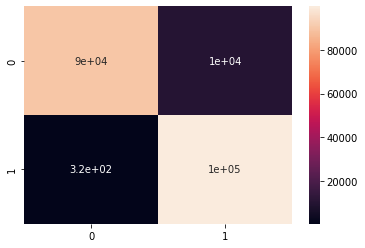

In [64]:
#Prediction on test data
y_pred5 = best_random.predict(X_test)

#Prediction on train data
y_pred_train5 = best_random.predict(X_train)

#Model Evaluation
#Print accuracy and Roc auc values of NBC model
print("Train Accuracy of model is : ", accuracy_score(y_train,y_pred_train5))
print("Test Accuracy of model is : ", accuracy_score(y_test,y_pred5))
print("ROC_AUC Score of model is :",roc_auc_score(y_pred5,y_test))
print(classification_report(y_pred5 ,y_test))

#Confusion matrix
con_mat = confusion_matrix(y_test, y_pred5)
print("Confusion matrix of model is :", confusion_matrix(y_test,y_pred5))
sns.heatmap(con_mat,annot=True)

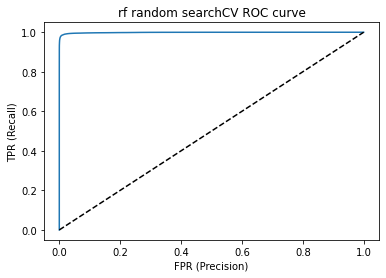

Area under curve (AUC):  0.9987860406629314


In [65]:
#Plotting ROC Curve
rfg_score = best_random.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, rfg_score)

plt.title('rf random searchCV ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

Conclusion:

After Hyperparameter tuning on Random Forest model using Random SearchCV we can see the slight change in the accuracy i. e.




*   Accuracy is increased from 0.9450 to 0.9464

*   Precision is increased from 0.9031 to 0.9055

*   Recall is increased from 0.9967 to 0.9970


*   F1-Score is increased from 0.9477 to 0.9489





This results can said to be good for this dataset.